In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_excel('Concrete_Data.xls')

In [3]:
df.head(5)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,Concretecompressivestrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Cement                       1030 non-null   float64
 1   BlastFurnaceSlag             1030 non-null   float64
 2   FlyAsh                       1030 non-null   float64
 3   Water                        1030 non-null   float64
 4   Superplasticizer             1030 non-null   float64
 5   CoarseAggregate              1030 non-null   float64
 6   FineAggregate                1030 non-null   float64
 7   Age                          1030 non-null   int64  
 8   Concretecompressivestrength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
df.describe()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,Concretecompressivestrength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


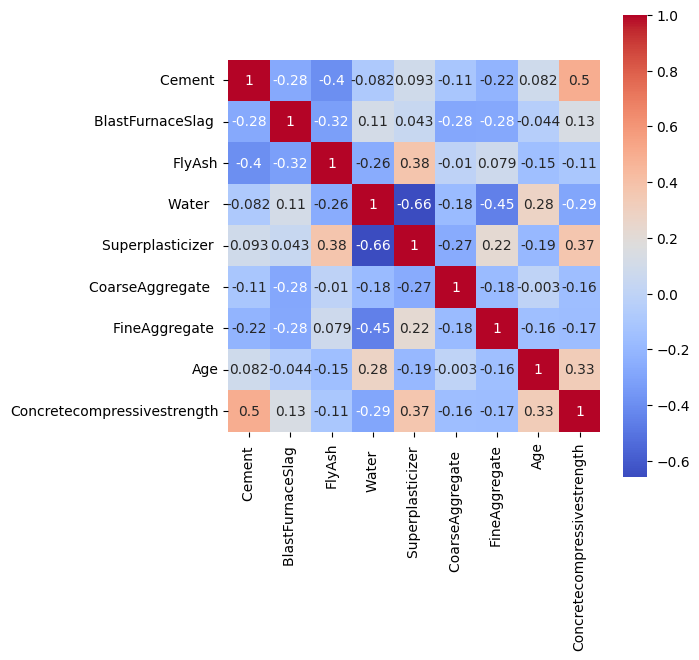

In [6]:
corr = df.corr()
plt.figure(figsize=(6, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.show()

In [7]:
df.isnull().sum()

Cement                         0
BlastFurnaceSlag               0
FlyAsh                         0
Water                          0
Superplasticizer               0
CoarseAggregate                0
FineAggregate                  0
Age                            0
Concretecompressivestrength    0
dtype: int64

In [8]:
y = df['Concretecompressivestrength']

In [9]:
X = df.drop('Concretecompressivestrength', axis = 1)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
rs = 42 #random state number

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=rs)

In [13]:
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test, test_size = 0.5 , random_state=rs)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)
X_train_scaled

array([[-1.16084578,  0.85739475,  0.9824742 , ..., -0.25745695,
        -0.64750466, -0.27567315],
       [ 1.30863359, -0.60248868,  1.23262536, ..., -1.92694714,
        -0.27313016, -0.27567315],
       [-0.07712211, -0.85558116,  1.06611849, ...,  1.01786573,
         0.06664868, -0.68931339],
       ...,
       [-0.86551317, -0.85558116,  1.12599843, ...,  1.3408288 ,
         0.3310584 ,  0.91561074],
       [ 1.78317559,  0.51111822, -0.83112174, ..., -1.54422319,
         0.11607106, -0.27567315],
       [ 0.28511162, -0.85558116,  0.93557085, ..., -0.61729375,
         0.13460445, -0.27567315]])

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout , BatchNormalization , AlphaDropout
import keras_tuner 

In [16]:
import random
random.seed(rs)
np.random.seed(rs)
keras.backend.clear_session()
tf.random.set_seed(rs)

In [17]:
def create_model(neurons1,neurons2,neurons3,lr):
    
    model = keras.Sequential([
            layers.Input(shape=(8,)), 
            Dense(neurons1, kernel_initializer='he_normal' , activation = 'relu'), 
            Dense(neurons2, kernel_initializer='he_normal' , activation = 'relu'), 
            Dense(neurons3, kernel_initializer='he_normal' , activation = 'relu'),
            Dense(1, activation='relu' )                 
    ])
    opt = keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=opt, loss='mean_squared_error' ,metrics=['mean_absolute_error'])
    return model

def build_model(hp):
    neurons1 = hp.Int("units1", min_value = 32 , max_value=128 , step=32)
    neurons2 = hp.Int("units2", min_value = 32 , max_value=128 , step=32)
    neurons3 = hp.Int("units3", min_value = 32 , max_value=128 , step=32)
    lr = hp.Float("learning_rate", min_value=1e-4, max_value=1e-1, sampling="log")
    
    model = create_model(
        neurons1=neurons1, 
        neurons2=neurons2,
        neurons3=neurons3, 
        lr=lr
    )
    return model

In [18]:
# To quickly test if the model builds successfully
build_model(keras_tuner.HyperParameters())

In [19]:
tuner = keras_tuner.BayesianOptimization(
      build_model,
      objective='val_loss',
      max_trials=50,
      seed = rs, #random state
      overwrite=True)

In [20]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': 'linear'}
units2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': 'linear'}
units3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': 'linear'}
learning_rate (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.1, 'step': None, 'sampling': 'log'}


In [21]:
tuner.search(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_val_scaled, y_val))

Trial 50 Complete [00h 00m 19s]
val_loss: 25.75391960144043

Best val_loss So Far: 18.309139251708984
Total elapsed time: 00h 18m 44s


In [22]:
best_model=tuner.get_best_models()[0]

In [23]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hps.get('units1'))
print(best_hps.get('units2'))
print(best_hps.get('units3'))
print(best_hps.get('learning_rate'))
best_model.summary()

96
128
32
0.015902380174411247
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 96)                864       
                                                                 
 dense_1 (Dense)             (None, 128)               12416     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 17,441
Trainable params: 17,441
Non-trainable params: 0
_________________________________________________________________


In [24]:
from keras.callbacks import ModelCheckpoint
checkpoint_path = "hpc_ann_model.h5"

# Create a ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(checkpoint_path, 
                                 monitor='val_loss', 
                                 verbose=1, 
                                 save_best_only=True, 
                                 mode='min')

In [25]:
history = best_model.fit(X_train_scaled, y_train, epochs=100,
                    batch_size=32, validation_data=(X_val_scaled, y_val) , callbacks=[checkpoint_callback])

Epoch 1/100
25/26 [===========================>..] - ETA: 0s - loss: 12.3070 - mean_absolute_error: 2.6031
Epoch 1: val_loss improved from inf to 19.95471, saving model to hpc_ann_model.h5
26/26 [==============================] - 1s 15ms/step - loss: 12.7402 - mean_absolute_error: 2.6231 - val_loss: 19.9547 - val_mean_absolute_error: 3.2217
Epoch 2/100
16/26 [=================>............] - ETA: 0s - loss: 10.1301 - mean_absolute_error: 2.4001
Epoch 2: val_loss did not improve from 19.95471
26/26 [==============================] - 0s 5ms/step - loss: 10.5424 - mean_absolute_error: 2.3954 - val_loss: 23.1723 - val_mean_absolute_error: 3.6499
Epoch 3/100
16/26 [=================>............] - ETA: 0s - loss: 9.0475 - mean_absolute_error: 2.2636
Epoch 3: val_loss improved from 19.95471 to 19.64549, saving model to hpc_ann_model.h5
26/26 [==============================] - 0s 7ms/step - loss: 10.1846 - mean_absolute_error: 2.3087 - val_loss: 19.6455 - val_mean_absolute_error: 3.1856
Epo

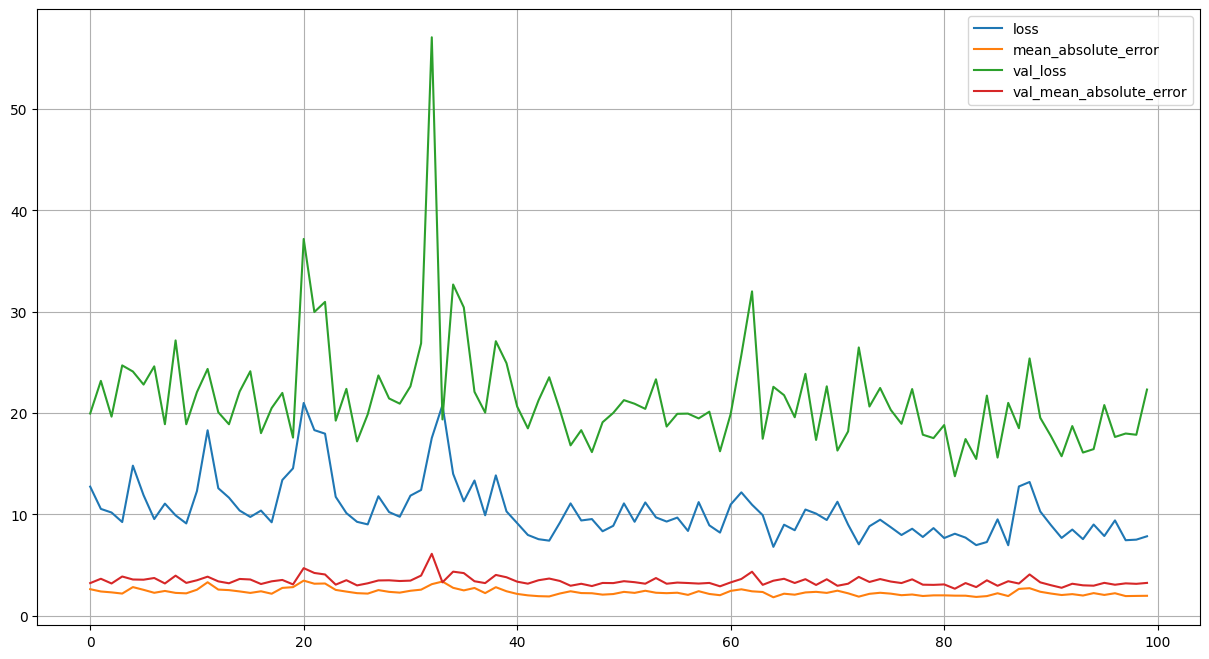

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame (history.history).plot(figsize=(15,8))
plt.grid(True)
plt.show()

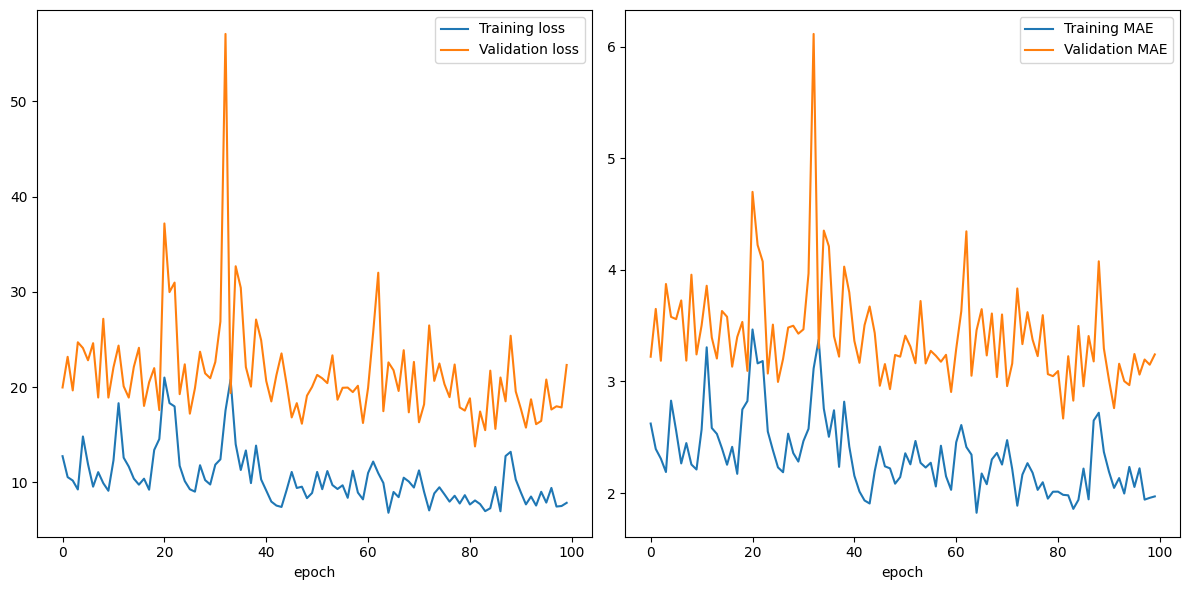

In [27]:
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

fig, axs = plt.subplots(1, 2, figsize=(12,6))
j=0
axs[j].plot(loss, label='Training loss')
axs[j].plot(val_loss, label='Validation loss')
axs[j].set_xlabel('epoch')
axs[j].legend()
j=j+1
axs[j].plot(mae, label='Training MAE')
axs[j].plot(val_mae, label='Validation MAE')
axs[j].set_xlabel('epoch')
axs[j].legend()

plt.tight_layout()
plt.show()

In [28]:
# Load the best model
from keras.models import load_model
best_saved_model = load_model(checkpoint_path)

predictions = best_saved_model.predict(X_test_scaled[:-1])
Real = y_test[:-1]

4/4 [==============================] - 0s 3ms/step


In [29]:
temp1 = pd.DataFrame(predictions, columns=['Predictid Values'])
temp2 = Real.to_frame('Real Values').reset_index(drop=True)
cdf = pd.concat([temp1,temp2], axis=1)
cdf.head()

,Predictid Values,Real Values
0,24.274035,23.690395
1,43.184875,41.051401
2,40.411293,42.140084
3,21.273153,15.085735
4,20.372370,23.076762


In [30]:
from sklearn.metrics import r2_score

y_pred_train = best_saved_model.predict(X_train_scaled)
r2score_train = r2_score(y_train, y_pred_train)
print(r2score_train)

y_pred_val = best_saved_model.predict(X_val_scaled)
r2score_val = r2_score(y_val, y_pred_val)
print(r2score_val)

y_pred_test = best_saved_model.predict(X_test_scaled)
r2score_test = r2_score(y_test, y_pred_test)
print(r2score_test)

26/26 [==============================] - 0s 1ms/step
0.9757596524044437
4/4 [==============================] - 0s 2ms/step
0.9451015923654762
4/4 [==============================] - 0s 2ms/step
0.9074253256294568


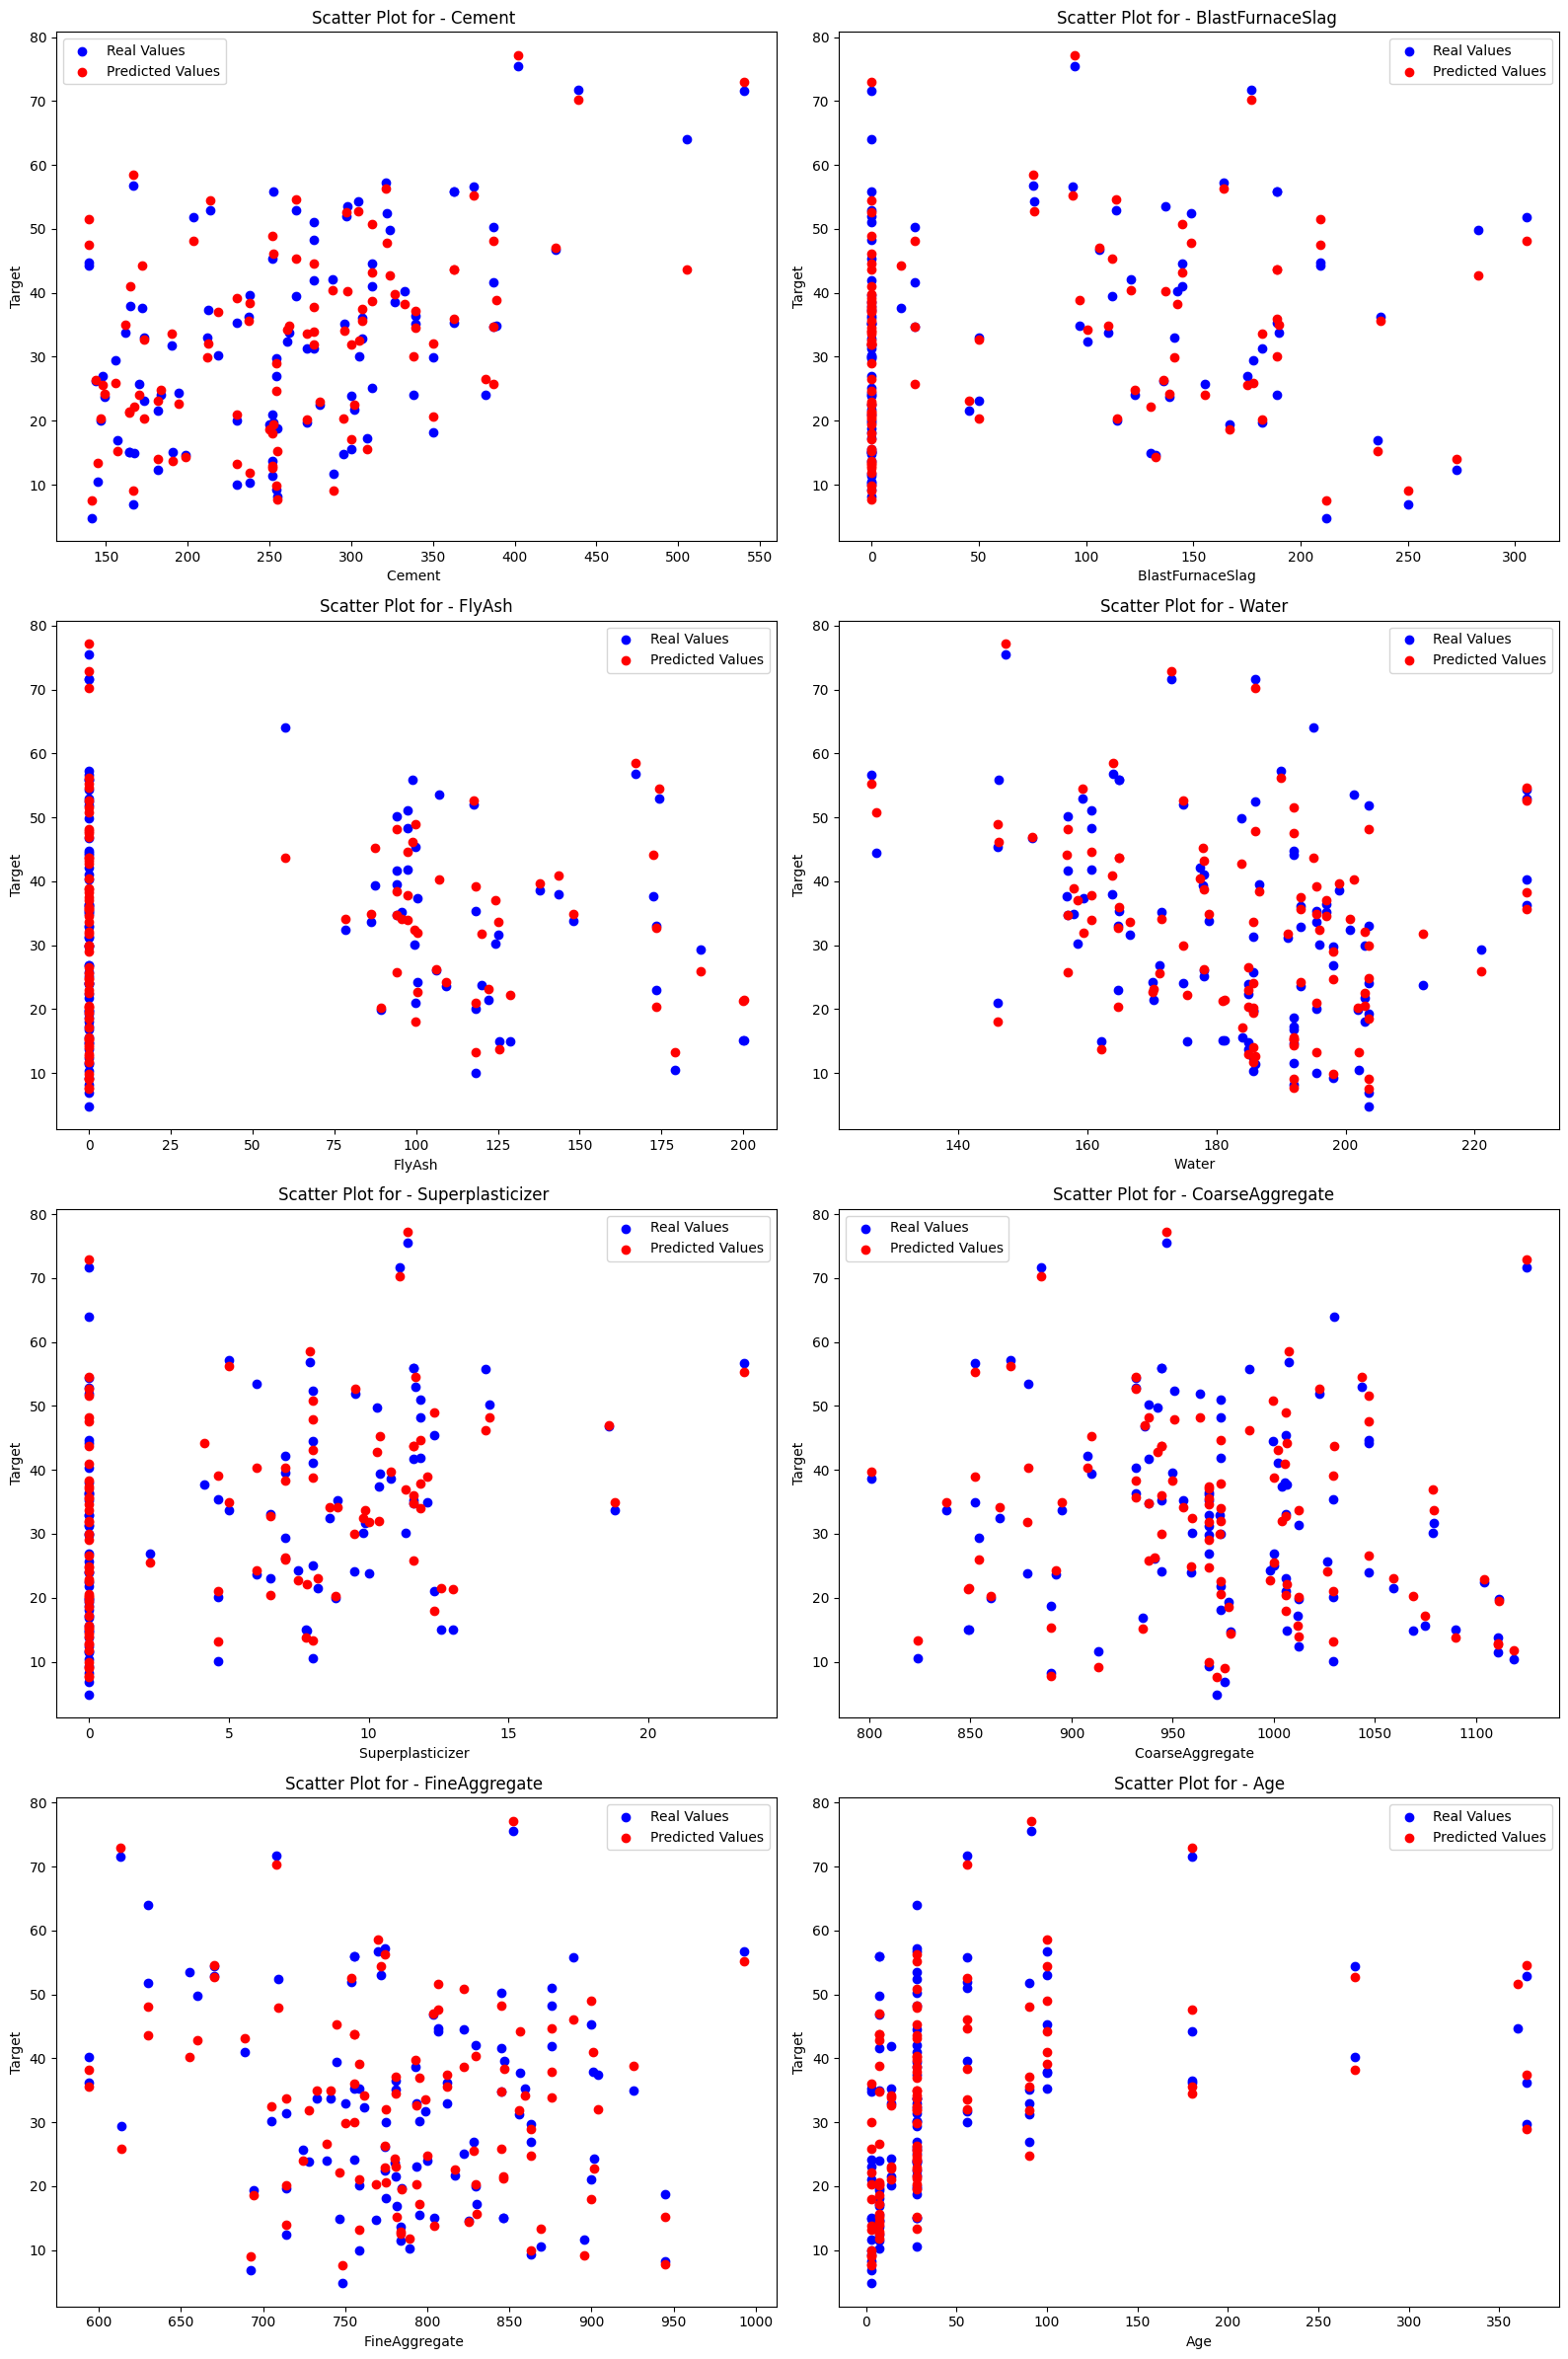

In [31]:
fig, axs = plt.subplots(4, 2, figsize=(16, 24))
a=0
for i in range(0,4):
    for j in range(0,2):
        axs[i][j].scatter(X_test.iloc[:, a], y_test, color='blue', label='Real Values')
        axs[i][j].scatter(X_test.iloc[:, a], y_pred_test, color='red', label='Predicted Values')
        axs[i][j].set_xlabel(f'{X.columns[a]}')
        axs[i][j].set_ylabel('Target')
        axs[i][j].set_title(f'Scatter Plot for - {X.columns[a]}')
        axs[i][j].legend()
        a = a+1

plt.tight_layout()
plt.show()

### test set ###

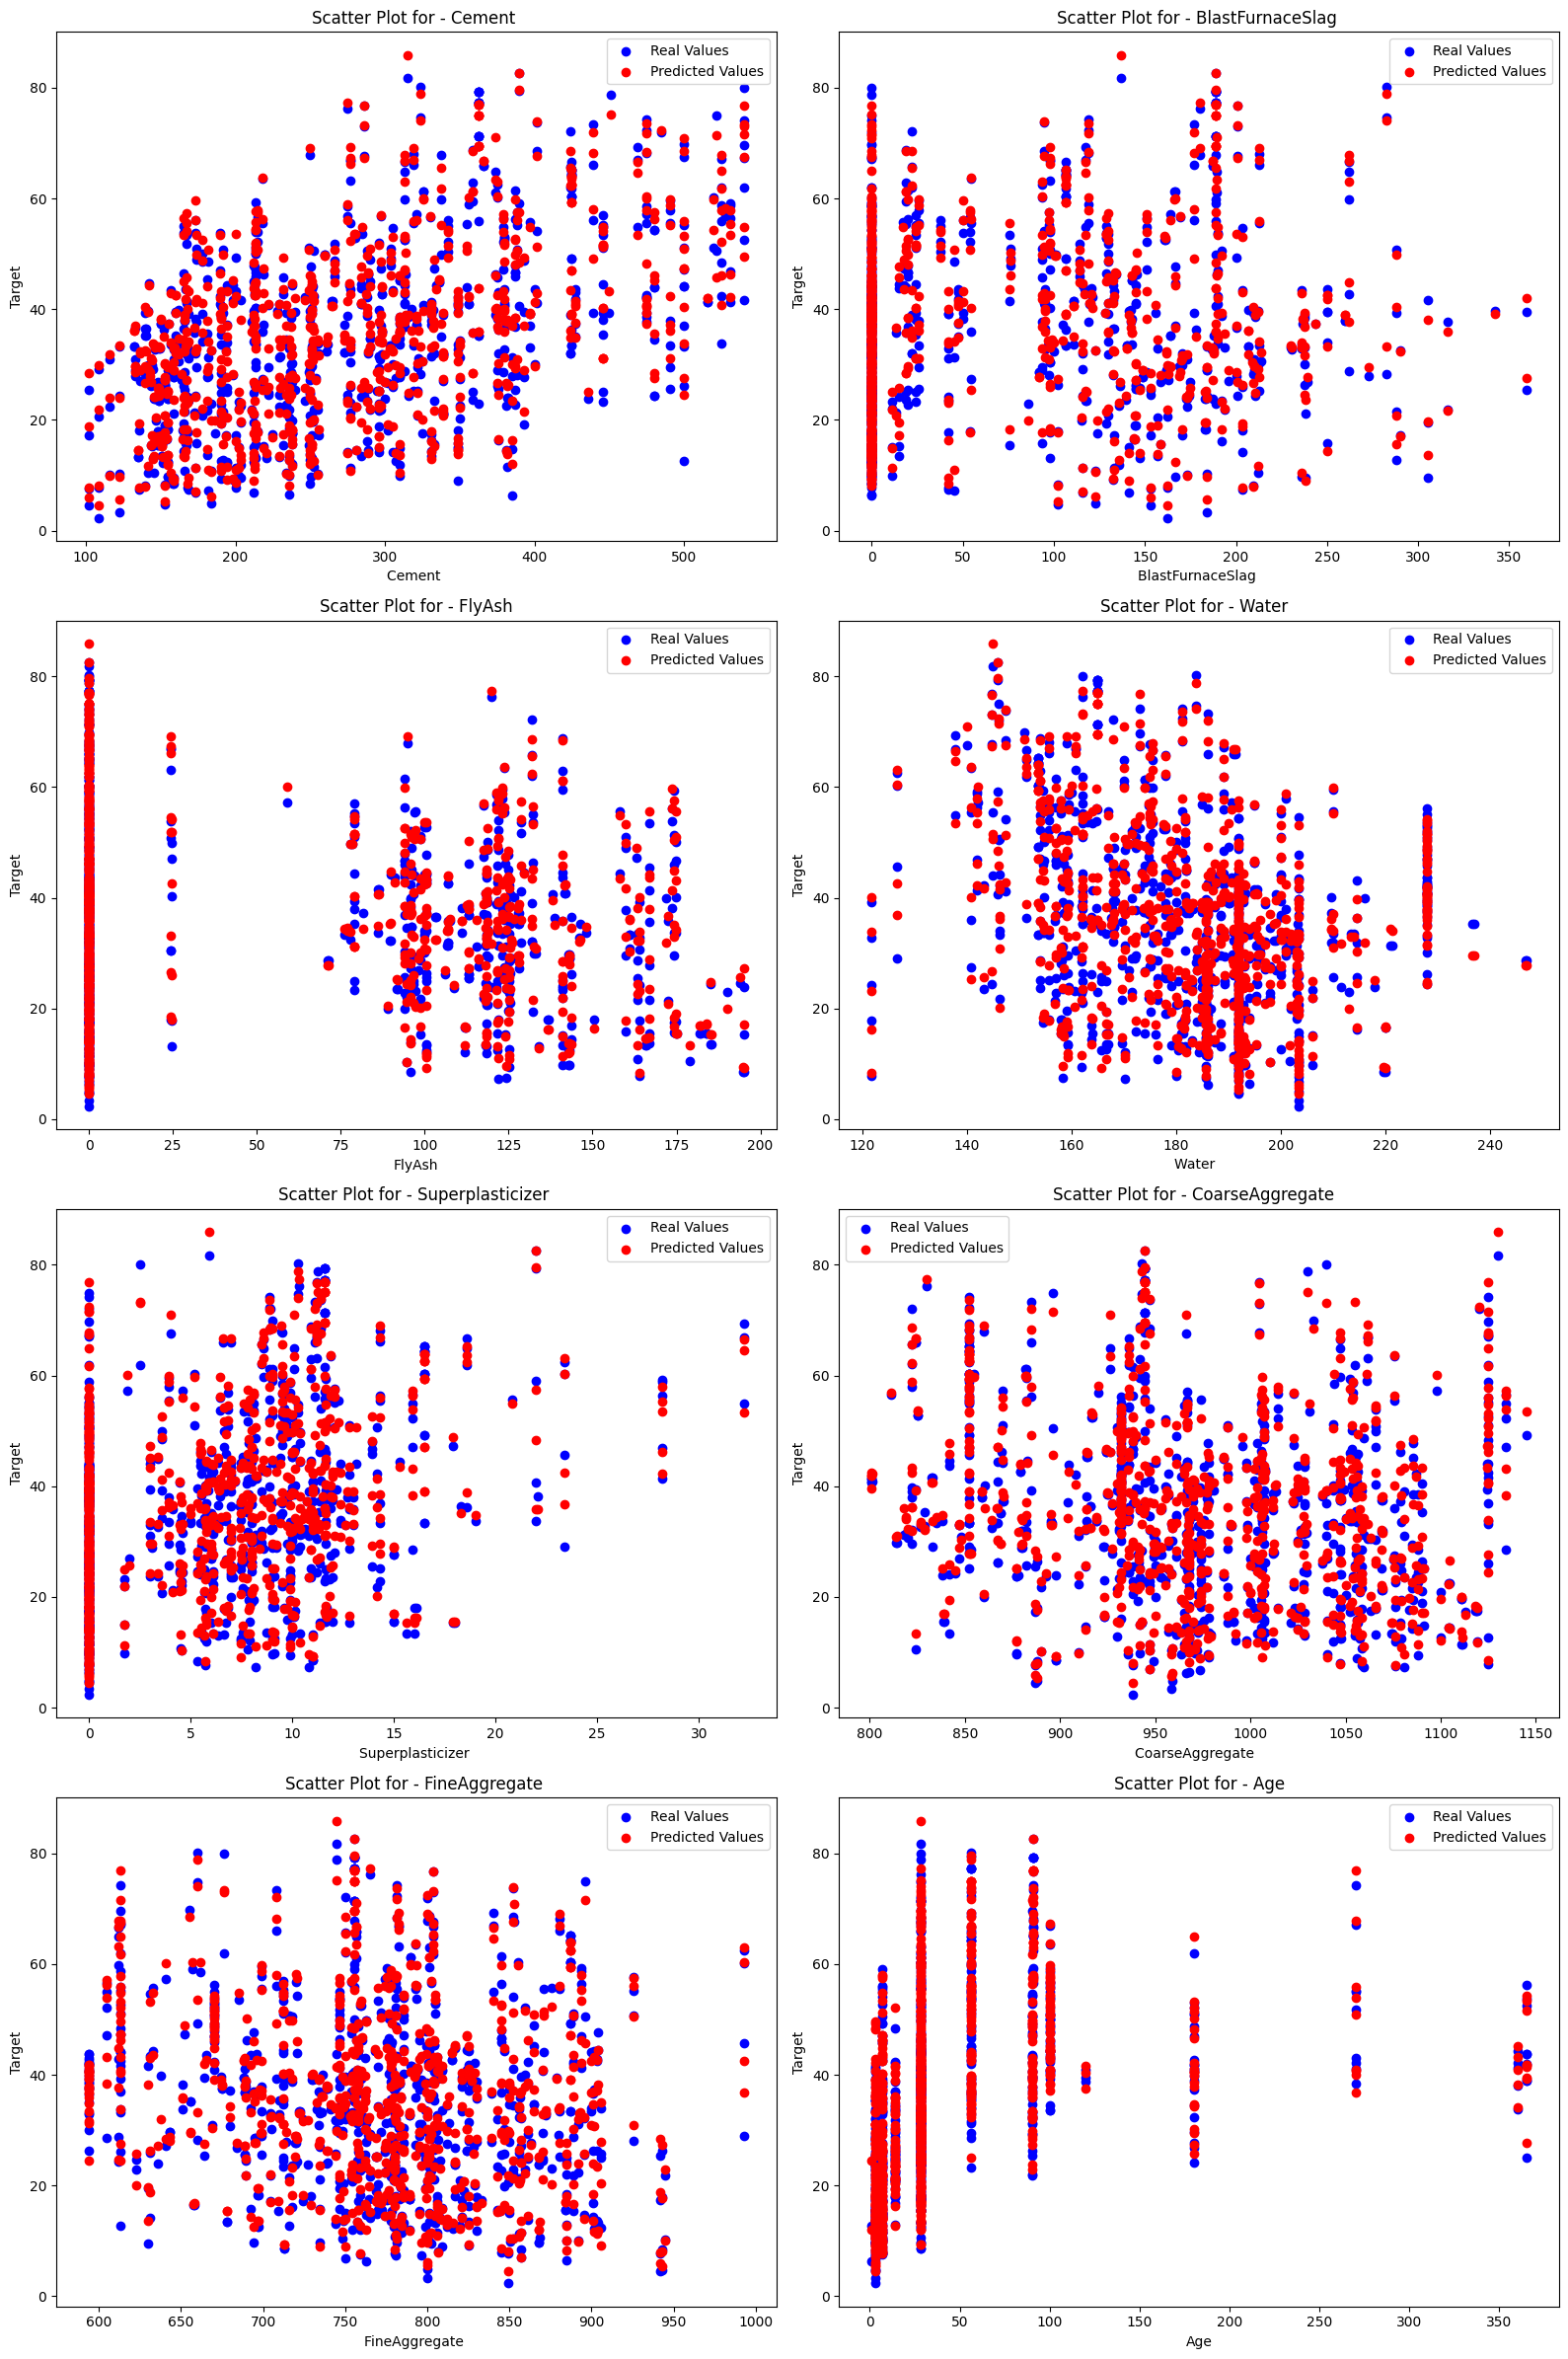

In [32]:
fig, axs = plt.subplots(4, 2, figsize=(16, 24))
a=0
for i in range(0,4):
    for j in range(0,2):
        axs[i][j].scatter(X_train.iloc[:, a], y_train, color='blue', label='Real Values')
        axs[i][j].scatter(X_train.iloc[:, a], y_pred_train, color='red', label='Predicted Values')
        axs[i][j].set_xlabel(f'{X.columns[a]}')
        axs[i][j].set_ylabel('Target')
        axs[i][j].set_title(f'Scatter Plot for - {X.columns[a]}')
        axs[i][j].legend()
        a = a+1

plt.tight_layout()
plt.show()

### training set

In [33]:
test_loss = best_saved_model.evaluate(X_test_scaled, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 23.0560 - mean_absolute_error: 3.3218


In [34]:
from sklearn.metrics import mean_absolute_error ,mean_squared_error
from math import sqrt

In [37]:
y_pred = best_saved_model.predict(X_test_scaled)
print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt (mean_squared_error(y_test, y_pred)))
print('r2', r2_score (y_test, y_pred))

4/4 [==============================] - 0s 5ms/step
mean_absolute_error 3.3218277770572016
mean_squared_error 23.055979484151557
root_mean_squared_error 4.80166424108887
r2 0.9074253256294568
